Handling of Relational Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Dataset.csv")

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [ ]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [ ]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
df.shape[1]

4

In [ ]:
df.iloc[1]

Country        Spain
Age             27.0
Salary       48000.0
Purchased        Yes
Name: 1, dtype: object

In [ ]:
x = df.iloc[:,:-1].values

In [ ]:
# importing an array of features
x = df.iloc[:, :-1].values 
# importing an array of dependent variable
y = df.iloc[:, -1].values

### Missing Data
* Mean Imputation

In [ ]:
from sklearn.impute import SimpleImputer
# To replace the missing value we create below object of SimpleImputer class
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
''' Using the fit method, we apply the `imputa` object on the matrix of our feature x.
The `fit()` method identifies the missing values and computes the mean of such feature a missing value is present.
'''
imputa.fit(x[:, 1:3])
# Repalcing the missing value using transform method
x[:, 1:3] = imputa.transform(x[:, 1:3])

In [ ]:
x 

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
df['Country'].value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

### Encoding Categorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

#### Handling of Text Data

In [2]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
import pandas as pd
import re
import string
import math
data = pd.read_csv('/content/spam.csv')

In [14]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data.rename(columns={'Category':'class', 'Message':'text'},inplace=True)

In [16]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [18]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews

In [19]:
data.dtypes

class    object
text     object
dtype: object

In [20]:
data['text']=data['text'].apply(lambda x:expand_contractions(x))

In [21]:
data["text"] = data["text"].str.lower()

In [22]:
data['text'][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [23]:
data['text'] = data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [24]:
data['text'] = data['text'].apply(lambda x: re.sub('W*dw*','',x))

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [28]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

In [29]:
stop_words = set(stopwords.words('english'))

In [30]:
data['text'][0]

'go jurong point crazy available bugis n great worl la e buffet cine got amore wat'

In [31]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["text"] = data["text"].apply(lambda x: stem_words(x))

In [32]:
data['text'][0]

'go jurong point crazi avail bugi n great worl la e buffet cine got amor wat'

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [36]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["text"] = data["text"].apply(lambda text: lemmatize_words(text))

#### Handling Time Series data

In [ ]:
df = pd.read_csv("/content/AirPassengers.csv")

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [ ]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

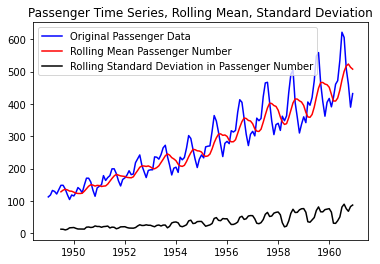

In [ ]:
plt.plot(df, color='blue',label='Original Passenger Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean Passenger Number')
plt.plot(rolling_std, color='black', label = 'Rolling Standard Deviation in Passenger Number')
plt.title('Passenger Time Series, Rolling Mean, Standard Deviation')
plt.legend(loc='best')

In [ ]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print('One Month Lag:', autocorrelation_lag1)

One Month Lag: 0.9601946480498523


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


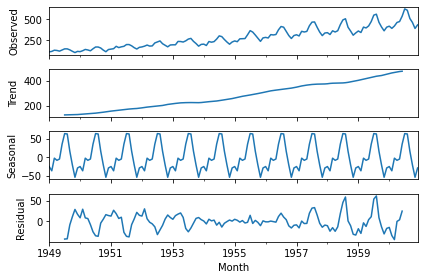

In [ ]:
decompose = seasonal_decompose(df['#Passengers'],model='additive')
decompose.plot()
plt.show()